<a href="https://colab.research.google.com/github/sanglee/KIBME2019/blob/master/5_Practice_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Machine Learning & AI: Practice 2

-----------


<br><br>

<h3><div style="text-align: center"> 한양대학교 에리카, AI Lab <br><br>
이상근 </div> </h3>


## Prepare Digits Data Set

In [0]:
from sklearn.datasets import load_digits

digits = load_digits()


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3, random_state=0)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train) # not on the test set
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## Classification with Logistic Regression

In [2]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=0.1, random_state=0, solver='lbfgs', multi_class='auto')
lr.fit(X_train_std, y_train)

from sklearn.metrics import accuracy_score

y_pred = lr.predict(X_train_std)
print('Train-set Accuracy: %.2f' % accuracy_score(y_train, y_pred))
y_pred = lr.predict(X_test_std)
print('Test-set Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Train-set Accuracy: 0.99
Test-set Accuracy: 0.96


## Classification with SVM

In [3]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', random_state=0, C=1.0)
svm.fit(X_train_std, y_train)

y_pred = svm.predict(X_train_std)
print('Train-set Accuracy: %.2f' % accuracy_score(y_train, y_pred))
y_pred = svm.predict(X_test_std)
print('Test-set Accuracy: %.2f' % accuracy_score(y_test, y_pred))

from sklearn import metrics

print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, y_pred))

Train-set Accuracy: 1.00
Test-set Accuracy: 0.97
Confusion matrix:
[[45  0  0  0  0  0  0  0  0  0]
 [ 0 51  0  0  0  0  0  0  1  0]
 [ 0  0 53  0  0  0  0  0  0  0]
 [ 0  0  1 52  0  0  0  0  1  0]
 [ 0  0  0  0 48  0  0  0  0  0]
 [ 0  0  0  0  0 56  0  0  0  1]
 [ 0  1  0  0  0  0 59  0  0  0]
 [ 0  0  0  0  2  0  0 50  0  1]
 [ 0  3  0  2  0  0  0  0 55  1]
 [ 0  0  0  1  0  1  0  0  0 55]]


## Classification with Kernel SVM

In [7]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=0, gamma=0.01, C=10.0)
svm.fit(X_train_std, y_train)

y_pred = svm.predict(X_train_std)
print('Train-set Accuracy: %.2f' % accuracy_score(y_train, y_pred))
y_pred = svm.predict(X_test_std)
print('Test-set Accuracy: %.2f' % accuracy_score(y_test, y_pred))

from sklearn import metrics
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, y_pred))

Train-set Accuracy: 1.00
Test-set Accuracy: 0.99
Confusion matrix:
[[45  0  0  0  0  0  0  0  0  0]
 [ 0 51  0  0  1  0  0  0  0  0]
 [ 0  0 53  0  0  0  0  0  0  0]
 [ 0  0  0 53  1  0  0  0  0  0]
 [ 0  0  0  0 48  0  0  0  0  0]
 [ 0  0  0  0  0 55  1  0  0  1]
 [ 0  0  0  0  0  0 60  0  0  0]
 [ 0  0  0  0  0  0  0 53  0  0]
 [ 0  1  1  0  0  0  0  0 59  0]
 [ 0  0  0  0  0  1  0  1  0 55]]


## Classification with Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_train)
print('Train-set Accuracy: %.2f' % accuracy_score(y_train, y_pred))
y_pred = tree.predict(X_test)
print('Test-set Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Train-set Accuracy: 0.38
Test-set Accuracy: 0.33


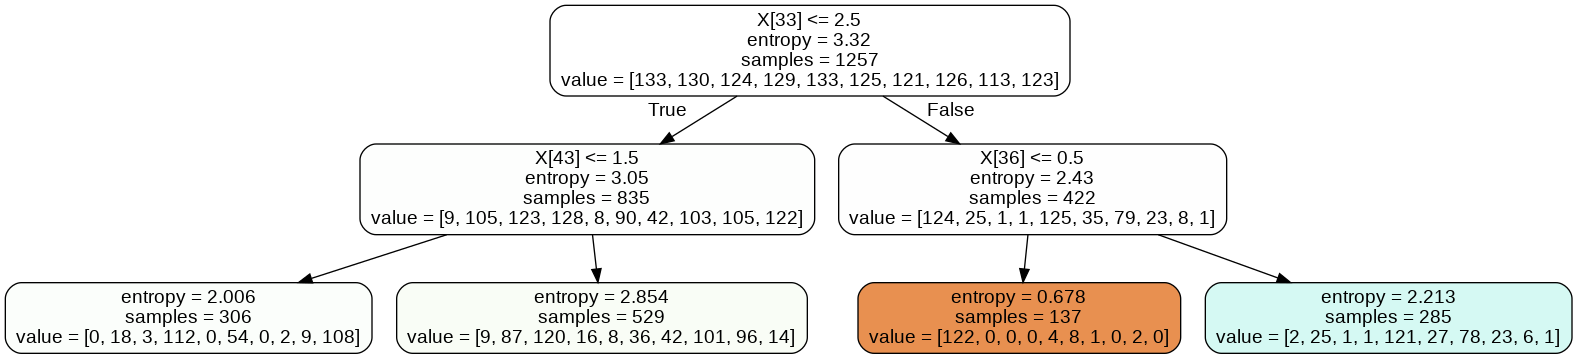

In [20]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
%matplotlib inline
        
dot_data = export_graphviz(tree,  out_file=None, feature_names=None, 
                           filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)  
display(Image(graph.create_png()))

## Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='entropy', n_estimators=1000, 
                                max_features='auto', #auto, sqrt, log2, None
                                max_depth=None, random_state=1, n_jobs=2)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_train)
print('Train-set Accuracy: %.2f' % accuracy_score(y_train, y_pred))
y_pred = forest.predict(X_test)
print('Test-set Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Train-set Accuracy: 1.00
Test-set Accuracy: 0.98


## PCA Analysis

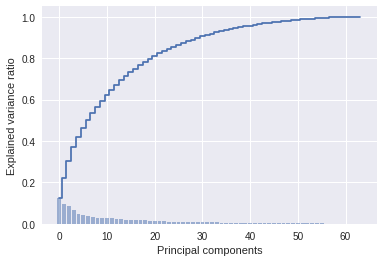

In [24]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

vals = pca.explained_variance_ratio_[:]

plt.bar(range(0, vals.size), vals, alpha=0.5, align='center')
plt.step(range(0, vals.size), np.cumsum(vals), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

(1257, 10)


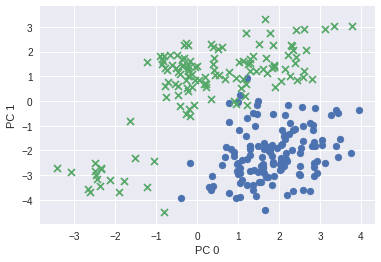

In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

print(X_train_pca.shape)

A = 0
B = 1
PC_x = 0
PC_y = 1
plt.scatter(X_train_pca[y_train==A, PC_x], X_train_pca[y_train==A, PC_y], marker='o')
plt.scatter(X_train_pca[y_train==B, PC_x], X_train_pca[y_train==B, PC_y], marker='x')
plt.xlabel('PC %d' % PC_x)
plt.ylabel('PC %d' % PC_y)
plt.show()


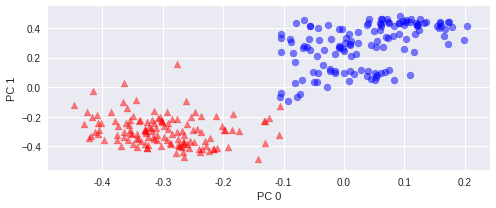

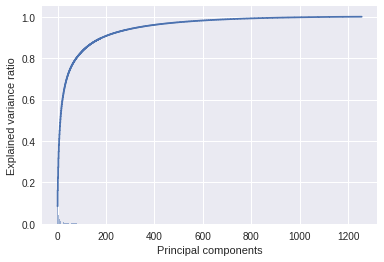

In [28]:
from sklearn.decomposition import KernelPCA
from matplotlib.ticker import FormatStrFormatter

scikit_kpca = KernelPCA(kernel='rbf', gamma=.01) 
X_kpca = scikit_kpca.fit_transform(X_train_std)

fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(7,3))
ax.scatter(X_kpca[y_train==A, PC_x], X_kpca[y_train==A, PC_y], color='red', marker='^', alpha=0.5)
ax.scatter(X_kpca[y_train==B, PC_x], X_kpca[y_train==B, PC_y], color='blue', marker='o', alpha=0.5)
ax.set_xlabel('PC %d' % PC_x)
ax.set_ylabel('PC %d' % PC_y)
ax.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
plt.tight_layout()
plt.show()

vals = scikit_kpca.lambdas_[:] / sum(scikit_kpca.lambdas_)
plt.bar(range(0, vals.size), vals, alpha=0.5, align='center')
plt.step(range(0, vals.size), np.cumsum(vals), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()